In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
scores = pd.read_csv(url)
print("Data imported successfully")

scores.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
scores.shape 

(25, 2)

Rows: 25, columns:2

In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


No missing values

In [5]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for outliers

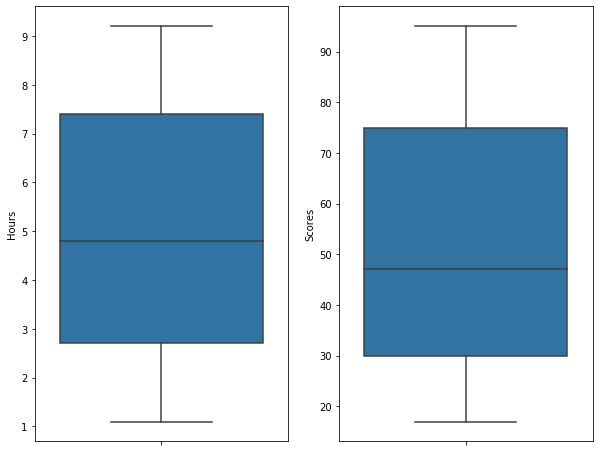

In [6]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.boxplot(y='Hours',data=scores)
plt.subplot(1,2,2)
sns.boxplot(y='Scores',data=scores)
plt.show()

No outliers in the data

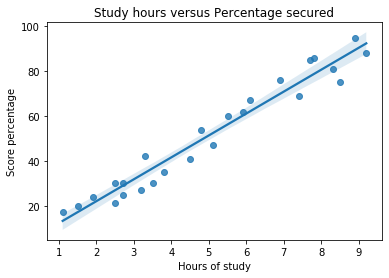

In [7]:
sns.regplot(x='Hours',y="Scores",data=scores)
plt.xlabel("Hours of study")
plt.ylabel("Score percentage")
plt.title("Study hours versus Percentage secured")
plt.show()

Linear relation exists between both the variables

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(scores,test_size=0.2,random_state=100)

In [9]:
df_train.shape

(20, 2)

In [10]:
df_test.shape

(5, 2)

In [11]:
y_train=df_train.pop('Scores')
X_train=df_train

In [12]:
y_test=df_test.pop('Scores')
X_test=df_test

# Building a Linear Model using the Train set

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# importing metrics to check model accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr.coef_

array([9.83544438])

In [16]:
lr.intercept_

1.989423110974684

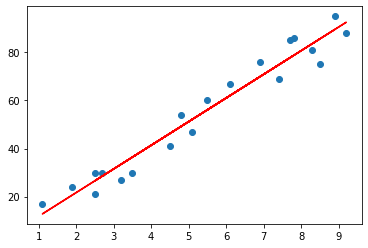

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, 'r')
plt.show()

In [18]:
y_train_predict=lr.predict(X_train)

In [19]:

rsquared=r2_score(y_train,y_train_predict)
rsquared

0.9519568836485192

# Predictions on the test set

In [20]:
y_test_predict=lr.predict(X_test)

In [21]:
testdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})  
testdf 

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


In [22]:
mae=mean_absolute_error(y_test,y_test_predict)

rmse=np.sqrt(mean_squared_error(y_test,y_test_predict))
rsquared=r2_score(y_test,y_test_predict)

In [23]:
print("Mean Absolute Error :",+mae)
print("Root Mean Squared Error :",+rmse)
print("R squared :",+rsquared)


Mean Absolute Error : 4.140342096254413
Root Mean Squared Error : 4.543287018366107
R squared : 0.9050356232459791


# Residual Analysis

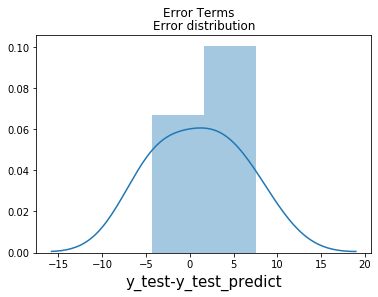

In [24]:

sns.distplot(y_test-y_test_predict)
plt.suptitle('Error Terms')                  
plt.xlabel('y_test-y_test_predict',fontsize = 15)         # X-label
plt.title("Error distribution")
plt.show()

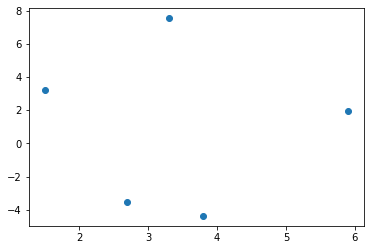

In [25]:
plt.scatter(X_test,(y_test-y_test_predict))
plt.show()

* The error terms are normally distributed
* The error terms show no pattern

In [26]:
hours = 9.25
hour=np.array(hours).reshape(-1,1)
predpercent = lr.predict(hour)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predpercent[0]))

No of Hours = 9.25
Predicted Score = 92.96728365185982
